In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import os
import csv

import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, cross_val_predict
import geopandas as gpd

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import matplotlib.gridspec as gridspec

from deforestutils import *

from joblib import dump, load
from joblib import Parallel, delayed




/Users/annieulichney/.local/share/virtualenvs/annieulichney-xxpO7m7Z/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/annieulichney/.local/share/virtualenvs/annieulichney-xxpO7m7Z/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode

  0%|          | 0/10 [00:00<?, ?it/s]

Set to create new indices for test train split and cross validation
Starting fit for 2004
Files setup.
Read in data for 2004
Years in data: [2004 2005 2006 2007]
Number of rows in data: (665048, 216)
Test set pct of data: 30.002044965175443
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


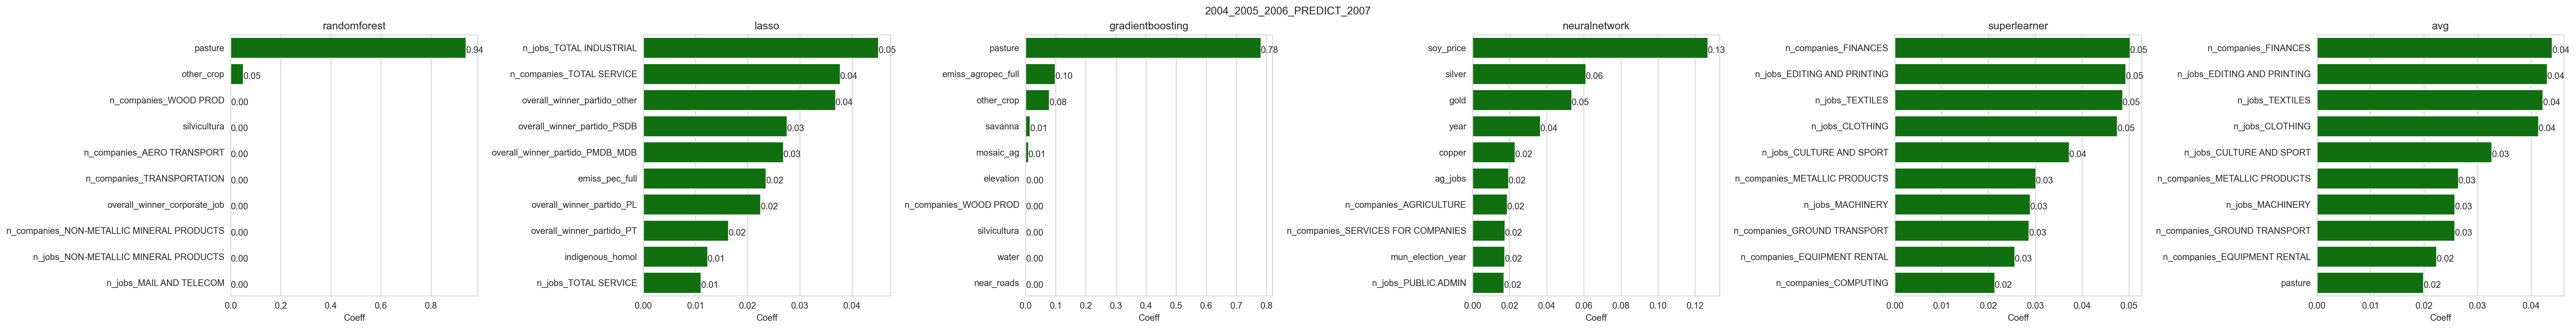

 10%|█         | 1/10 [00:16<02:30, 16.74s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2005
Files setup.
Read in data for 2005
Years in data: [2005 2006 2007 2008]
Number of rows in data: (664707, 216)
Test set pct of data: 29.999082302427986
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


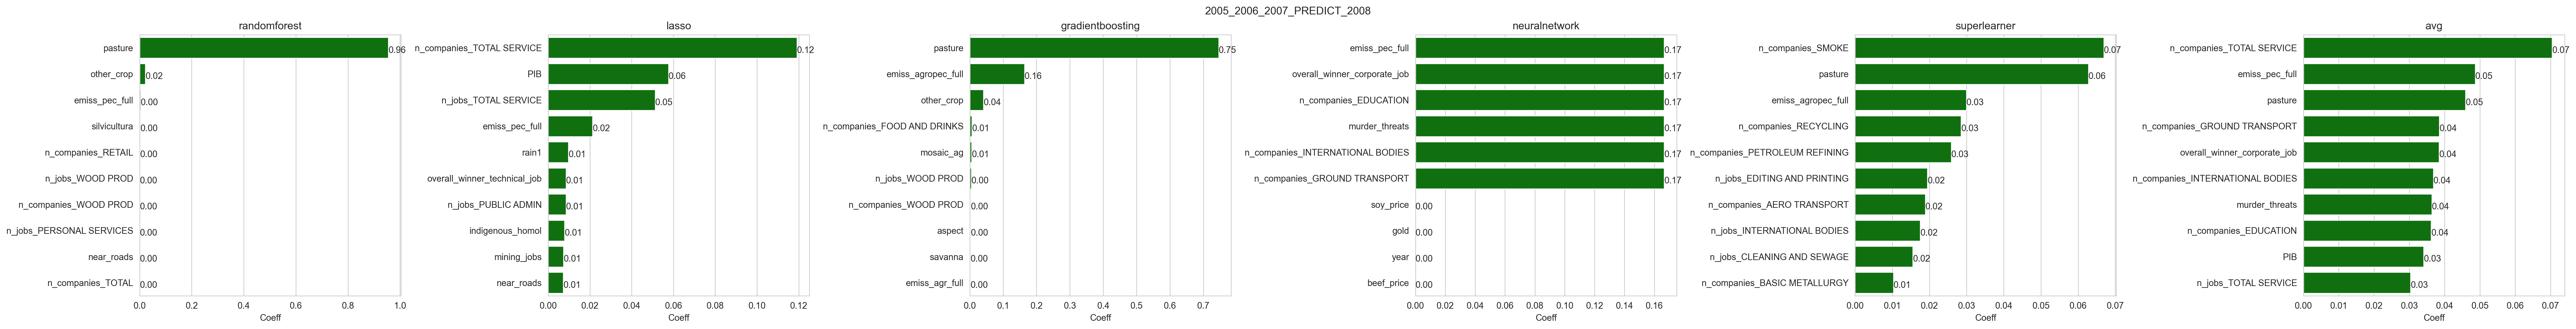

 20%|██        | 2/10 [00:33<02:12, 16.56s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2006
Files setup.
Read in data for 2006
Years in data: [2006 2007 2008 2009]
Number of rows in data: (664513, 216)
Test set pct of data: 30.000767479342016
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


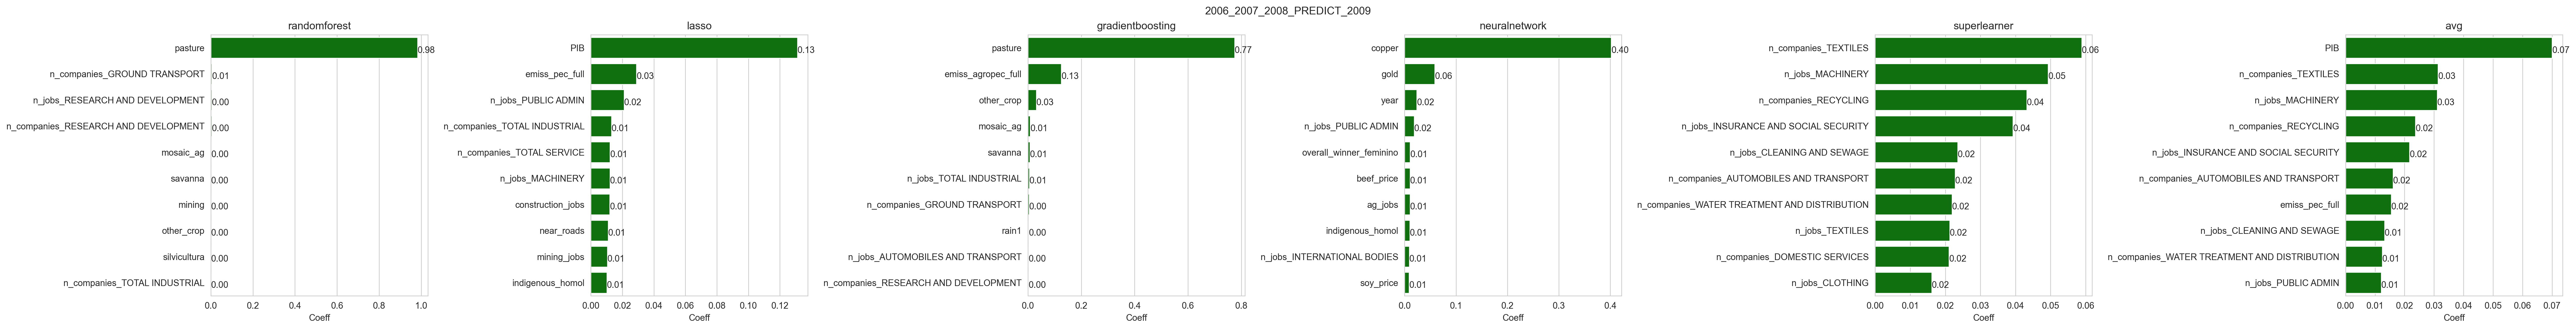

 30%|███       | 3/10 [00:49<01:54, 16.33s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2007
Files setup.
Read in data for 2007
Years in data: [2007 2008 2009 2010]
Number of rows in data: (663015, 216)
Test set pct of data: 30.00052789152583
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


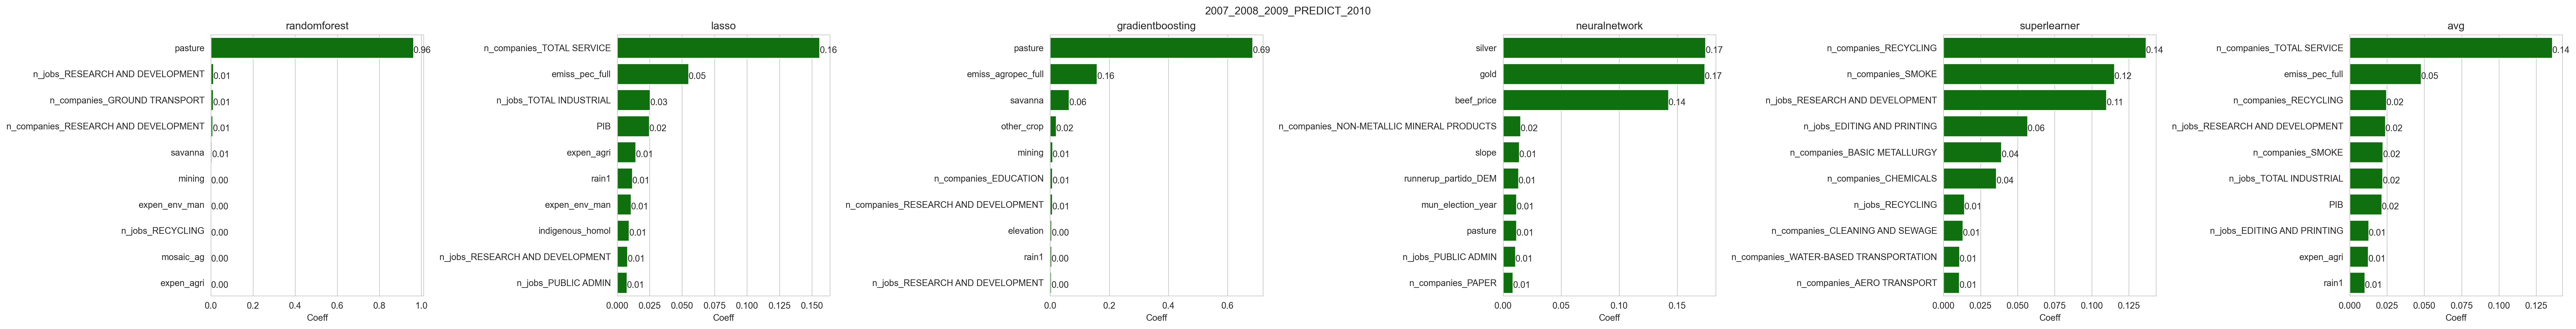

 40%|████      | 4/10 [01:05<01:38, 16.33s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2008
Files setup.
Read in data for 2008
Years in data: [2008 2009 2010 2011]
Number of rows in data: (663571, 216)
Test set pct of data: 30.00070828893969
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


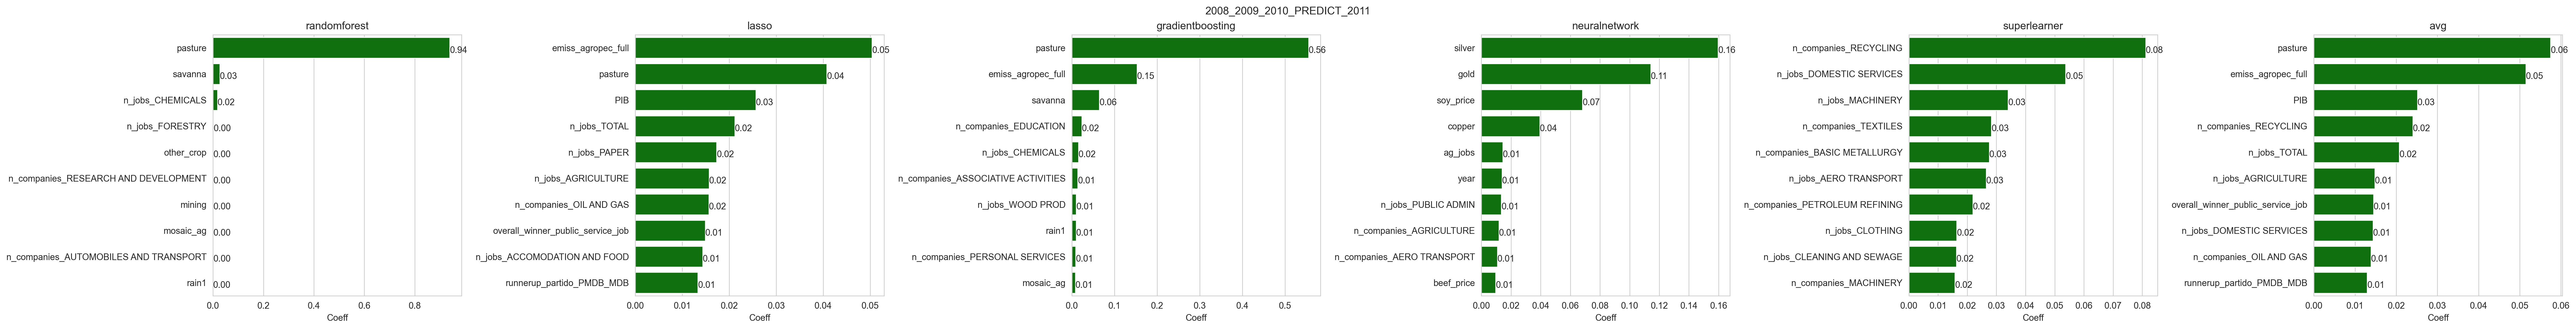

 50%|█████     | 5/10 [01:22<01:22, 16.42s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2009
Files setup.
Read in data for 2009
Years in data: [2009 2010 2011 2012]
Number of rows in data: (655314, 216)
Test set pct of data: 30.002868853709824
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


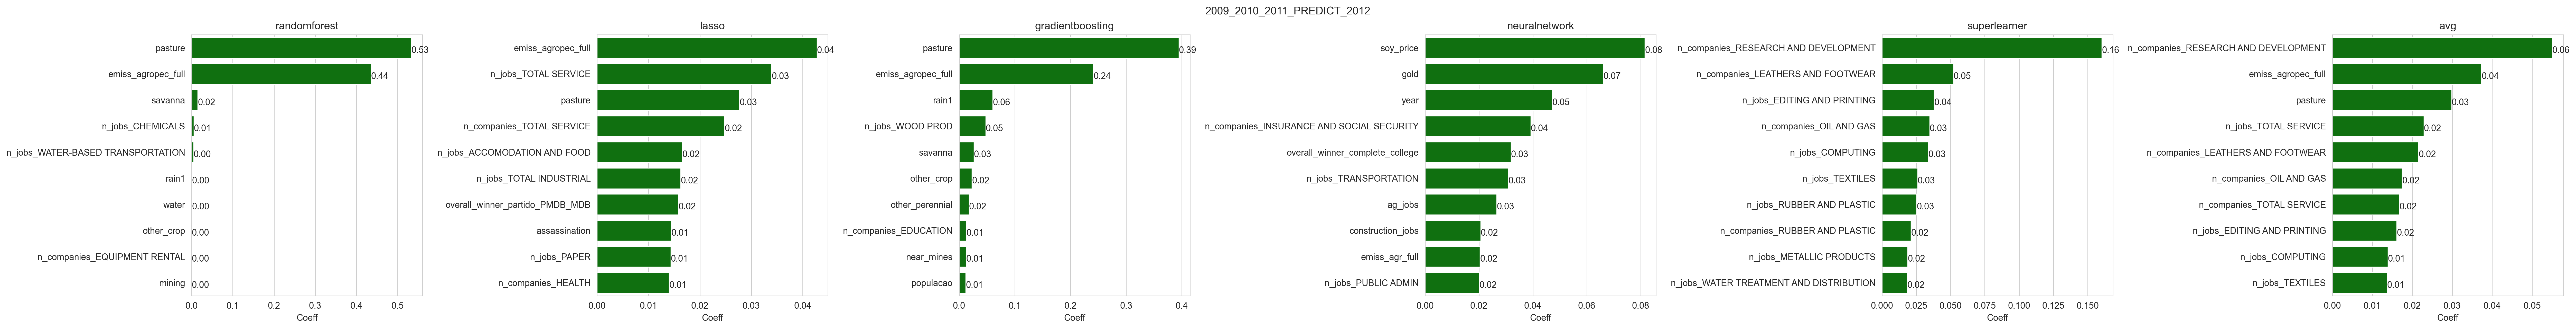

 60%|██████    | 6/10 [01:38<01:05, 16.33s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2010
Files setup.
Read in data for 2010
Years in data: [2010 2011 2012 2013]
Number of rows in data: (649156, 216)
Test set pct of data: 29.999414624527848
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


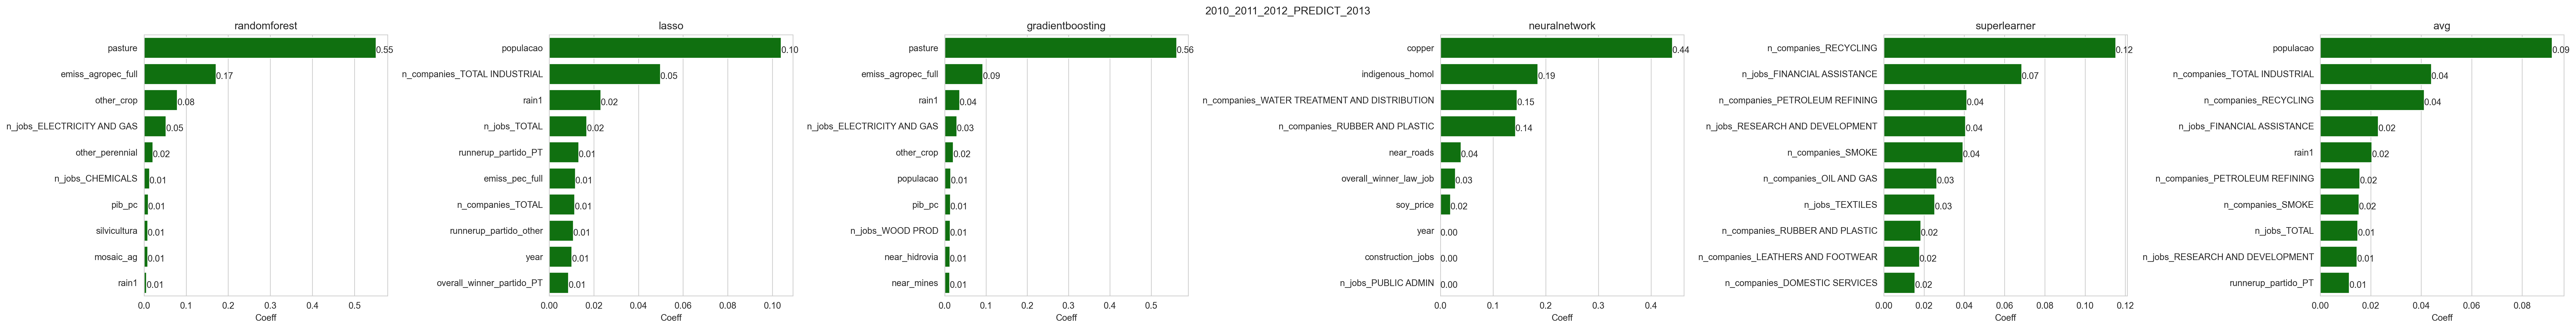

 70%|███████   | 7/10 [01:54<00:48, 16.16s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2011
Files setup.
Read in data for 2011
Years in data: [2011 2012 2013 2014]
Number of rows in data: (646764, 216)
Test set pct of data: 29.999350613206673
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


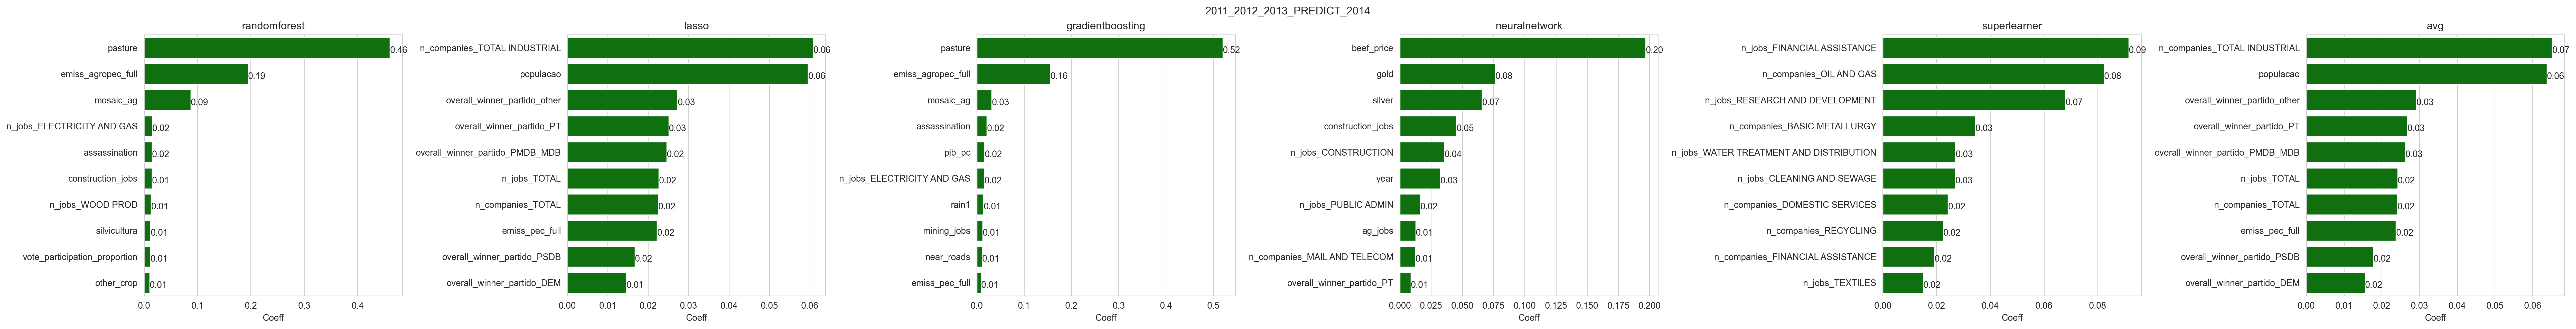

 80%|████████  | 8/10 [02:10<00:32, 16.16s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2012
Files setup.
Read in data for 2012
Years in data: [2012 2013 2014 2015]
Number of rows in data: (644324, 216)
Test set pct of data: 29.998106542671078
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


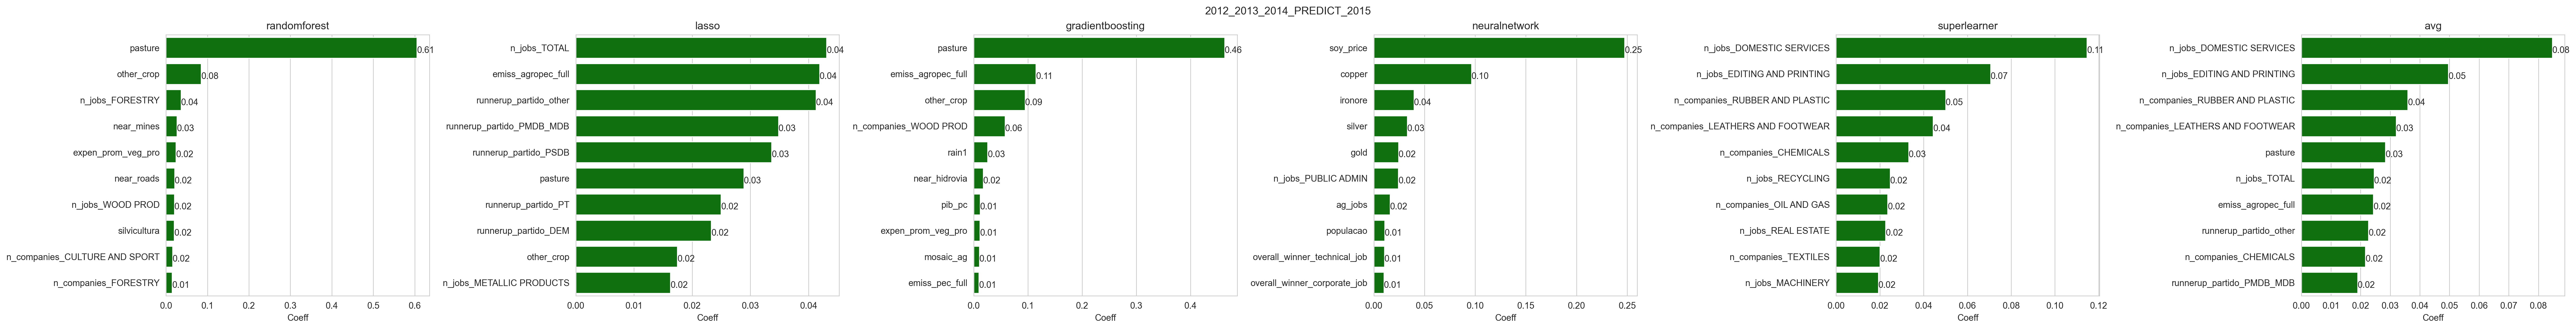

 90%|█████████ | 9/10 [02:25<00:15, 15.93s/it]

Set to create new indices for test train split and cross validation
Starting fit for 2013
Files setup.
Read in data for 2013
Years in data: [2013 2014 2015 2016]
Number of rows in data: (643935, 216)
Test set pct of data: 30.001785894539047
New test/train indices generated and saved in TestTrainSplit
New cross validation indices generated and read in


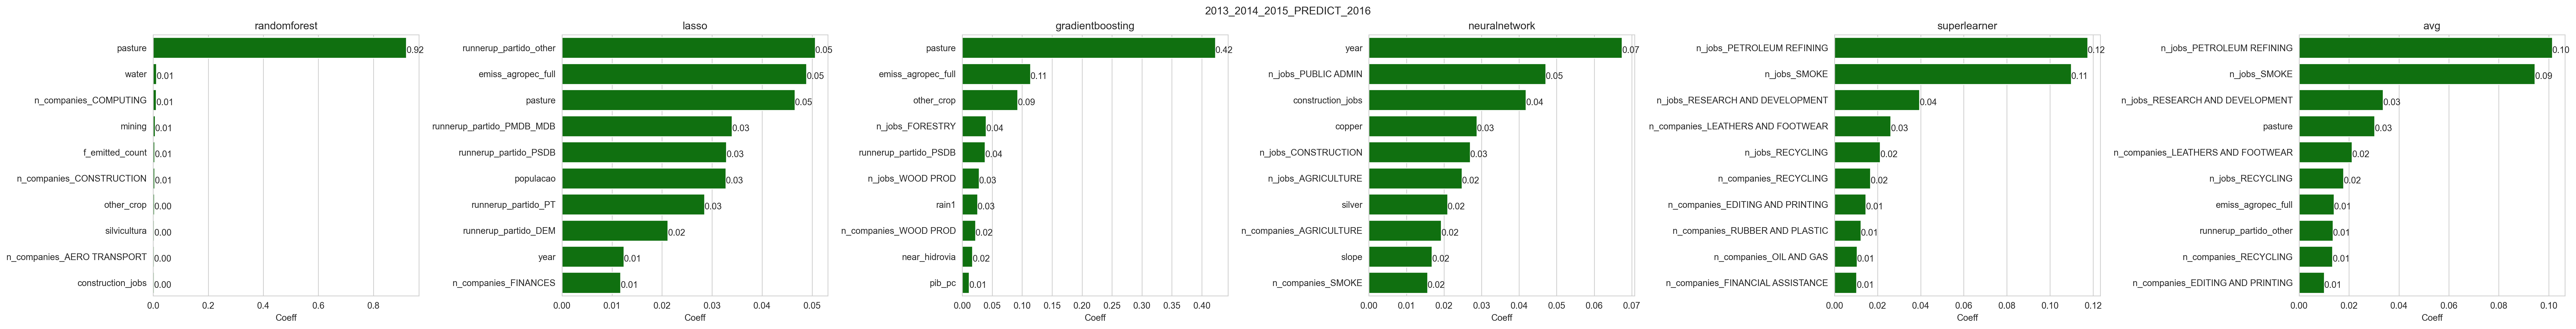

100%|██████████| 10/10 [02:41<00:00, 16.12s/it]


In [189]:
first_time = True
GET_NULLS = False
YEAR_LIST = [2004]

for this_start_year in tqdm(YEAR_LIST):
    SUBSET = False
    SUBSET_SIZE = 10000

    if first_time: 
        NEW_INDICES = True
        NEW_CV_INDICES = True
        #first_time = False
        print('Set to create new indices for test train split and cross validation')
    else: 
        NEW_INDICES = False
        NEW_CV_INDICES = False
        print('Reading previous iteration test train split indices and cross validation indices')
    

    PLOT_ENTIRE_AREA = False
    PLOT_FOLDS = False

    START_YEAR_TRAIN = this_start_year
    NUMBER_YEARS_TRAIN = 3
    YEARS_TO_TRAIN = [START_YEAR_TRAIN + i  for i in range(NUMBER_YEARS_TRAIN + 1)]

    PREDICT_YEAR = START_YEAR_TRAIN + NUMBER_YEARS_TRAIN

    FOLDER_NAME = ''.join([f'{START_YEAR_TRAIN + i}_' for i in list(range(NUMBER_YEARS_TRAIN))]) + f'PREDICT_{PREDICT_YEAR}'

    FILE_PATH = f'FeatureImportanceResults/{FOLDER_NAME}/'

    print(f'Starting fit for {this_start_year}')

    setup_directory(FOLDER_NAME)
    
    df_full = get_full_data(START_YEAR_TRAIN, YEARS_TO_TRAIN)
    
    if SUBSET:
        df_full = df_full.sample(SUBSET_SIZE).reset_index(drop=True)

    X, Y = split_XY(df_full)

    if NEW_INDICES:
        train_inds, test_inds = get_new_test_train_inds(X, Y, df_full, FOLDER_NAME)
    if not NEW_INDICES:
        train_inds, test_inds = get_prev_test_train_inds(FOLDER_NAME)

    X_train, X_test, Y_train, Y_test = split_test_train(df_full, train_inds, test_inds, PREDICT_YEAR, PLOT_ENTIRE_AREA, NEW_INDICES, FILE_PATH, FOLDER_NAME)

    if NEW_CV_INDICES:
        muni_cv = get_new_cv(X_train, Y_train, FOLDER_NAME, PLOT_FOLDS, df_full, PREDICT_YEAR, FILE_PATH)
    if not NEW_CV_INDICES:
        muni_cv = get_prev_cv(FOLDER_NAME)

    if GET_NULLS: get_null_count(X_train, FOLDER_NAME)
            
    X_train = X_train.drop('geometry', axis = 1)
    X_test = X_test.drop('geometry', axis = 1)

    #random forest
    randomforest_features_df = train_random_forest(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

    #lasso 
    lasso_features_df = train_lasso(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

    #gradient boosting
    gradient_boosting_features_df = train_gradient_boost(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)
    
    #neural network
    nn_features_df = train_neural_network(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

    #super learner ensemble
    base_learners = get_base_learners(FOLDER_NAME)
    super_learner_features_df = train_super_learner(X_train, Y_train, X_test, Y_test, FILE_PATH, muni_cv, base_learners, FOLDER_NAME)

    #visualize
    yhat_list = get_yhat_list(FOLDER_NAME)
    visualize_predictions(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)
    visualize_predictions_single_plot(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)

    for method in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner']:
       plot_feature_importance(FILE_PATH, FOLDER_NAME, method, use_abs = True)
       plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

    plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True)
    plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

#analysis for all years:
for method_string in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner', 'avg']:
    feature_importance_evolution(method_string, INCLUDE_FOREST = False)

plot_MSE()
    

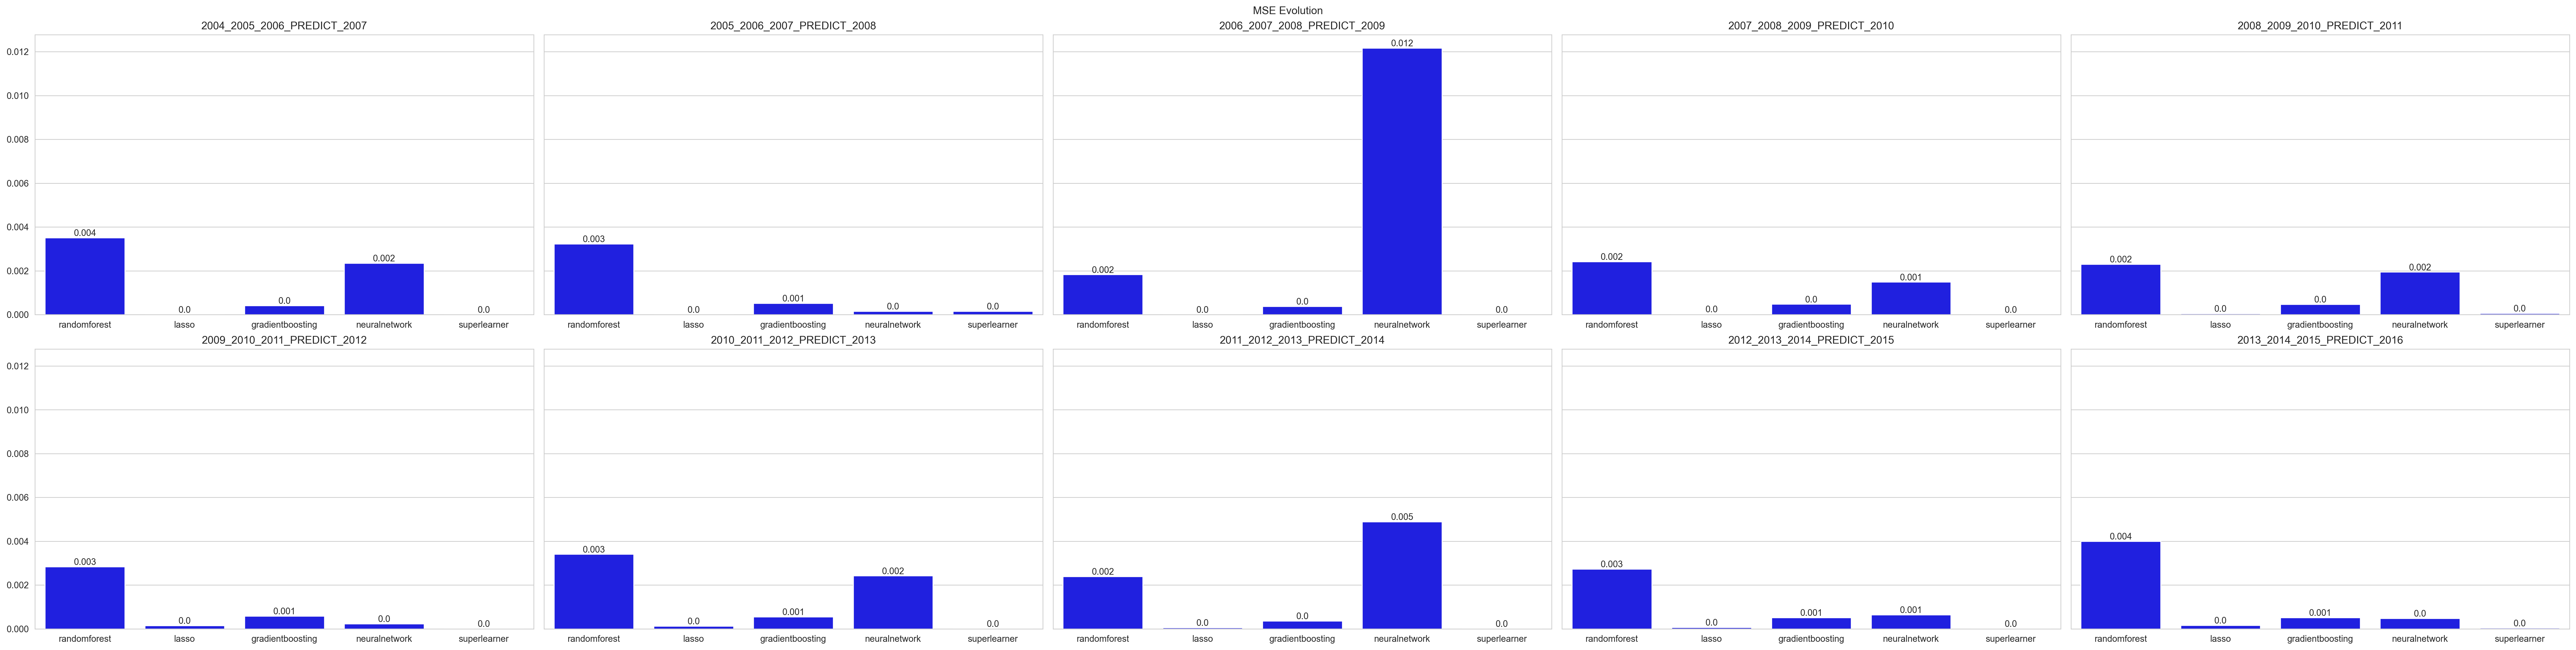

In [238]:
plot_MSE()

In [237]:
 def plot_MSE(): 
    sns.set_style('whitegrid')
    fig, axs = plt.subplots(2, 5, figsize=(40, 10), layout="constrained", dpi=250, sharey=True) 
    axs = axs.flatten()

    for i, start_year in enumerate([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]):
        START_YEAR_TRAIN = start_year
        NUMBER_YEARS_TRAIN = 3
        PREDICT_YEAR = START_YEAR_TRAIN + NUMBER_YEARS_TRAIN
        FOLDER_NAME = ''.join([f'{START_YEAR_TRAIN + i}_' for i in list(range(NUMBER_YEARS_TRAIN))]) + f'PREDICT_{PREDICT_YEAR}'
        FILE_PATH = f'FeatureImportanceResults/{FOLDER_NAME}/'

        file_path = FILE_PATH + '/performance.txt'
        with open(file_path, "r") as file:
            lines = file.readlines()
        content_list = [line.strip() for line in lines][2:]
        split_list = [s.split(' MSE: ') for s in content_list]
        labels = [e[0] for e in split_list]
        values = [float(e[1]) for e in split_list]
        sns.barplot(y=values, x=labels, color='blue', orient = 'v', ax=axs[i])

        axs[i].set_title(FOLDER_NAME) 
        axs[i].set(ylabel='')
        axs[i].set(xlabel='')

        for j, value in enumerate(values):
            axs[i].text(j, value, str(round(value, 3)), ha='center', va='bottom')

        # for u, patch in enumerate(axs[i].patches):
        #         width = patch.get_width()
        #         axs[i].annotate(f'{width:.2f}', (width, patch.get_y()+0.5), ha='left', va='center')

    fig.suptitle(f'MSE Evolution',  fontsize='large')
    plt.savefig('FeatureImportanceResults/MSE.png')
    plt.show()



<Axes: >

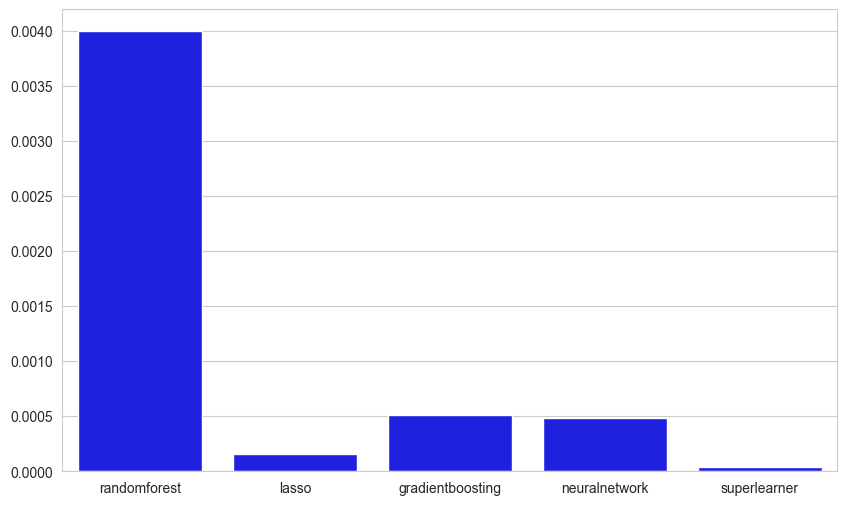

In [225]:
file_path = FILE_PATH + '/performance.txt'
with open(file_path, "r") as file:
    lines = file.readlines()

content_list = [line.strip() for line in lines][2:]
split_list = [s.split(' MSE: ') for s in content_list]

labels = [e[0] for e in split_list]
values = [float(e[1]) for e in split_list]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=values, x=labels, color='blue', orient = 'v')


In [222]:
values

[0.003996678030490013,
 0.0001577119711700281,
 0.0005126619858697259,
 0.0004796600448663341,
 3.938500153292077e-05]

In [76]:
def plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True):
    file_path = FILE_PATH + 'FeatureImportance/' + method + '.csv'

    df = pd.read_csv(file_path, index_col=0)
    file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_' + method

    if not INCLUDE_FOREST:
        df = df[~df.Feature.isin(['forest_lag', 'forest_formation'])]
        file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_exclude_forest_vars_' + method

    abs_sum = df['Coeff'].abs().sum()
    df['Coeff'] = df['Coeff'] / abs_sum

    coeff_values = df['Coeff'].head(10)
    feature_labels = df['Feature'].head(10)

    if abs:
        coeff_values = (abs(coeff_values))

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coeff_values, y=feature_labels, color='green')

    # Set plot title and labels
    plt.title(FOLDER_NAME + ' ' + method.upper() )
    #plt.xlabel('Abs')
    #plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(file_path_save)
    if SHOW: plt.show()

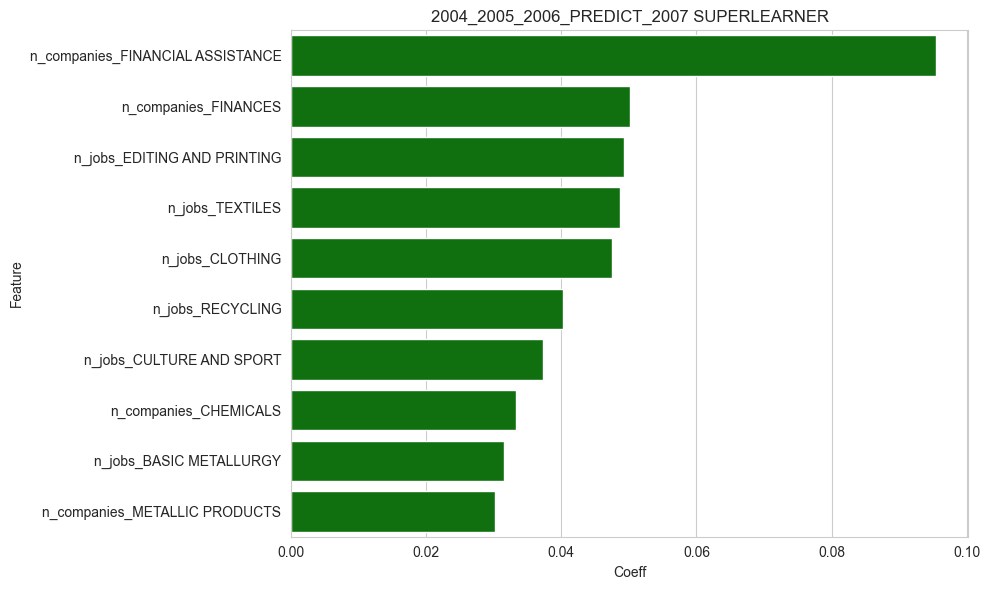

In [78]:
plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = False, use_abs = True)

In [71]:
df.head()

Feature     Coeff
203                        forest_lag -0.479329
187                  forest_formation  0.479158
37   n_companies_FINANCIAL ASSISTANCE -0.003964
45               n_companies_FINANCES  0.002084
94        n_jobs_EDITING AND PRINTING  0.002048

Feature     Coeff
37   n_companies_FINANCIAL ASSISTANCE -0.003964
45               n_companies_FINANCES  0.002084
94        n_jobs_EDITING AND PRINTING  0.002048
127                   n_jobs_TEXTILES  0.002019
116                   n_jobs_CLOTHING  0.001973
..                                ...       ...
198                              rice  0.000000
161                 term_limited_seat  0.000000
200                            coffee  0.000000
201                            citrus  0.000000
12                              dilma  0.000000

[202 rows x 2 columns]